In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
valid=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [24]:
train=keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/clahe-plant-disease/New folder (2)/Train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(227,227)
)
valid=keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/clahe-plant-disease/New folder (2)/Test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(227,227)
)

Found 18740 files belonging to 2 classes.
Found 1410 files belonging to 2 classes.


train=train.flow_from_directory(
    '/kaggle/input/clahe-plant-disease/New folder (2)/Train',
    target_size=(227,227),
    batch_size=16,
    class_mode='binary'
)
valid=valid.flow_from_directory(
    '/kaggle/input/clahe-plant-disease/New folder (2)/Test',
    target_size=(227,227),
    batch_size=16,
    class_mode='binary'
)

In [25]:
model=Sequential()

In [26]:
model.add(Conv2D(96,kernel_size=(11,11),padding='valid',strides=4,activation='relu',input_shape=(227,227,3)))
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='valid'))
model.add(Conv2D(256,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='valid'))
model.add(Conv2D(384,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(384,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='valid'))

In [27]:
model.add(Flatten())

In [28]:
model.add(Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,107,009 (23.30 MB)

 Trainable params: 6,107,009 (23.30 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [31]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),metrics=['accuracy'])

In [32]:
history=model.fit(train,epochs=15,validation_data=valid,callbacks=[callback])

Epoch 1/15
  3/586 ━━━━━━━━━━━━━━━━━━━━ 33s 58ms/step - accuracy: 0.4219 - loss: 18.4398  

I0000 00:00:1712827371.951457      95 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712827371.971220      95 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7124 - loss: 14.4780

W0000 00:00:1712827414.241629      95 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712827415.488445      95 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


586/586 ━━━━━━━━━━━━━━━━━━━━ 60s 81ms/step - accuracy: 0.7125 - loss: 14.4753 - val_accuracy: 0.8191 - val_loss: 10.3165
Epoch 2/15


W0000 00:00:1712827419.147227      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


586/586 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.8454 - loss: 9.3085 - val_accuracy: 0.8844 - val_loss: 6.8826
Epoch 3/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.8900 - loss: 6.3207 - val_accuracy: 0.8780 - val_loss: 4.9688
Epoch 4/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.9167 - loss: 4.5994 - val_accuracy: 0.8319 - val_loss: 3.9970
Epoch 5/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.9292 - loss: 3.6040 - val_accuracy: 0.9284 - val_loss: 3.1384
Epoch 6/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.9410 - loss: 2.9741 - val_accuracy: 0.8943 - val_loss: 2.7099
Epoch 7/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.9500 - loss: 2.5100 - val_accuracy: 0.9489 - val_loss: 2.2458
Epoch 8/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.9584 - loss: 2.1378 - val_accuracy: 0.9333 - val_loss: 1.9675
Epoch 9/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.9703 - loss: 1.8249 - val_accurac

In [33]:
import matplotlib.pyplot as plt

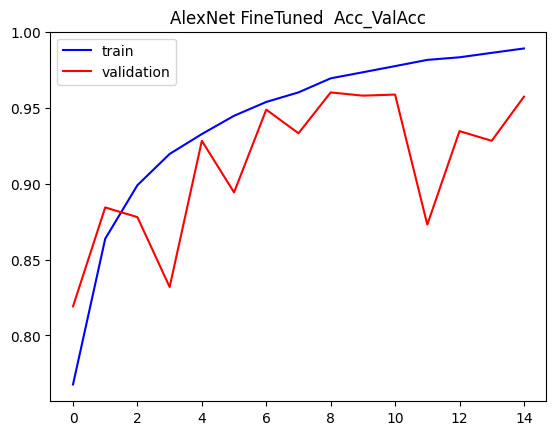

In [34]:
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='validation')
plt.legend()
plt.title("AlexNet FineTuned  Acc_ValAcc")
plt.savefig('accuracy_history.png')
plt.show()

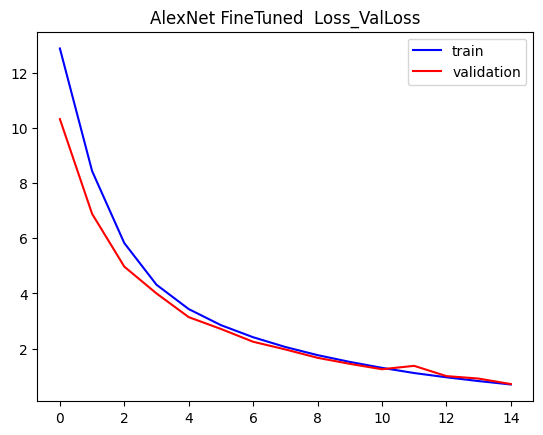

In [35]:
plt.plot(history.history["loss"],color='blue',label='train')
plt.plot(history.history["val_loss"],color='red',label='validation')
plt.legend()
plt.title("AlexNet FineTuned  Loss_ValLoss")
plt.savefig('loss_history.png')
plt.show()

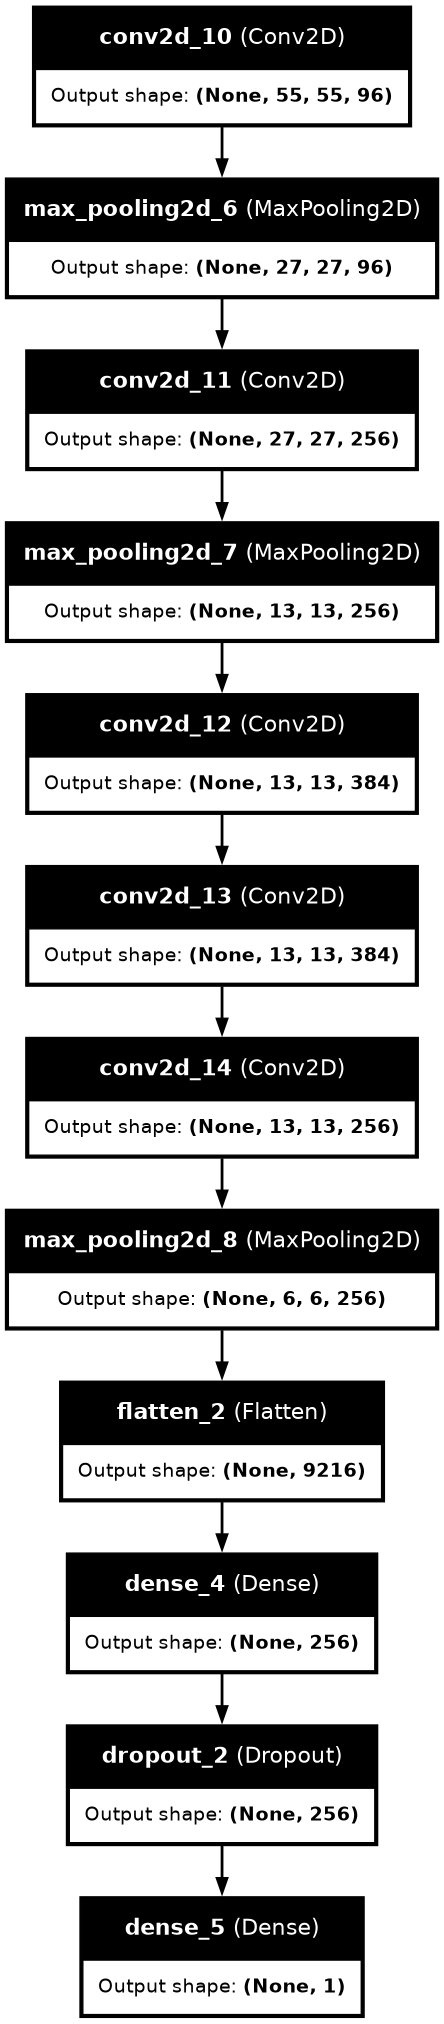

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True, dpi=100, to_file='model.png')

In [37]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import pandas as pd

In [38]:
import cv2
from matplotlib import pyplot as plt
def imgch(img):
    lab_img=cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
    l,a,b=cv2.split(lab_img)
    equ=cv2.equalizeHist(l)
    updated_lab_img =cv2.merge((equ,a,b))
    return cv2.cvtColor(updated_lab_img,cv2.COLOR_LAB2BGR)

58
549
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step
test accuracy: 11.5321 %




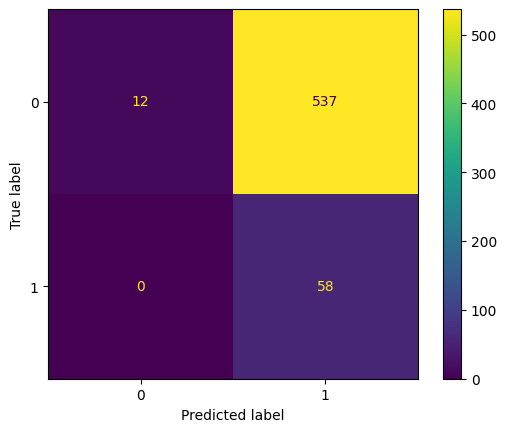

              precision    recall  f1-score   support

           0       1.00      0.02      0.04       549
           1       0.10      1.00      0.18        58

    accuracy                           0.12       607
   macro avg       0.55      0.51      0.11       607
weighted avg       0.91      0.12      0.06       607



In [39]:
import os
path="/kaggle/input/cirtustesting/New folder/"
im_size=227
images=[]
labels=[]
leaf_types=os.listdir('/kaggle/input/cirtustesting/New folder/')
leaf_types
for i in leaf_types:
  data_path=path+str(i)
  filenames=[i for i in os.listdir(data_path)]
  print(len(filenames))
  #print(filenames)
  for f in filenames:
    img=cv2.imread(data_path+'/'+f)
    img=imgch(img)
    img=cv2.resize(img,(im_size,im_size))
    images.append(img)
    labels.append(i)
import numpy as np
images=np.array(images)
#images=images.astype("float32")/255
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
y=labels
l=LabelEncoder()
l.fit(["Defected","Healthy"])
list(l.classes_)
y=l.transform(y)
y_pr=model.predict(images)
y_p=(y_pr>0.5)
y_p=pd.DataFrame(y_p)
y_predict=np.where(y_p[0]==True,1,0)
test_accu = np.sum(y == y_predict) / len(y) * 100
print(f"test accuracy: {round(test_accu, 4)} %\n\n")
cm=confusion_matrix(y, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y, y_predict))

409
3116
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
test accuracy: 56.5674 %




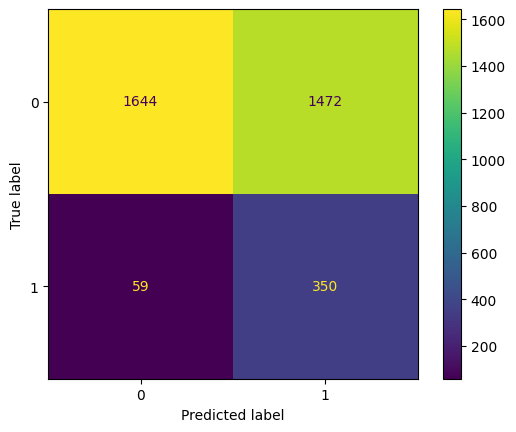

              precision    recall  f1-score   support

           0       0.97      0.53      0.68      3116
           1       0.19      0.86      0.31       409

    accuracy                           0.57      3525
   macro avg       0.58      0.69      0.50      3525
weighted avg       0.88      0.57      0.64      3525



In [43]:
import os
path="/kaggle/input/groundnuttest/New folder/"
im_size=227
images=[]
labels=[]
leaf_types=os.listdir('/kaggle/input/groundnuttest/New folder/')
leaf_types
for i in leaf_types:
  data_path=path+str(i)
  filenames=[i for i in os.listdir(data_path)]
  print(len(filenames))
  #print(filenames)
  for f in filenames:
    img=cv2.imread(data_path+'/'+f)
    img=imgch(img)
    img=cv2.resize(img,(im_size,im_size))
    images.append(img)
    labels.append(i)
import numpy as np
images=np.array(images)
#images=images.astype("float32")/255
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
y=labels
l=LabelEncoder()
l.fit(["Defected","Healthy"])
list(l.classes_)
y=l.transform(y)
y_pr=model.predict(images)


test accuracy: 54.6667 %




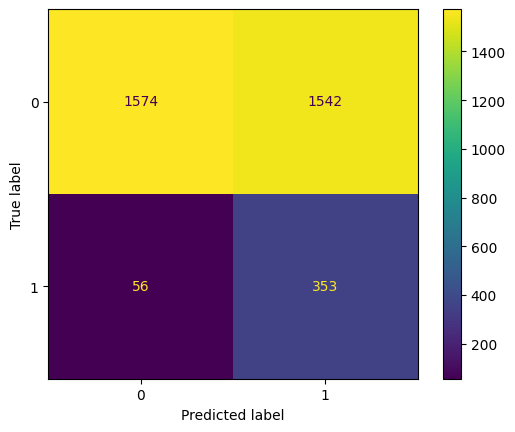

              precision    recall  f1-score   support

           0       0.97      0.51      0.66      3116
           1       0.19      0.86      0.31       409

    accuracy                           0.55      3525
   macro avg       0.58      0.68      0.48      3525
weighted avg       0.88      0.55      0.62      3525



In [47]:
y_p=(y_pr>0.5)
y_p=pd.DataFrame(y_p)
y_predict=np.where(y_p[0]==True,1,0)
test_accu = np.sum(y == y_predict) / len(y) * 100
print(f"test accuracy: {round(test_accu, 4)} %\n\n")
cm=confusion_matrix(y, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y, y_predict))

In [49]:
model.save('ModelAlexNet1.h5')

ImportError: `save_model()` using h5 format requires h5py. Could not import h5py.